# Scenes metrics visualization

In [119]:
import sys
import os

import numpy as np
import xarray as xr

sys.path.append(os.path.abspath(os.path.join('..', 'common_utils')))
from utils import *
import utils_plots
import Drifters_processing

%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.dpi'] = 300

path_save_plots = '../save_plots/L3_Overall_compa'

## Choose the filtering of the scenes

In [160]:
# 0.5km filter + drifter filter velocity and position
dir_scenes_liss1 = '/home/bouxdecl/Documents/MEOM_driftersCompa/data/results/Scenes_0point5kmfilterfield_48hfilterdrifter'

# 24h and 2km filter + drifter filter velocity and position 
dir_scenes_liss2 = '/home/bouxdecl/Documents/MEOM_driftersCompa/data/results/scenes_24h_2km_drifterfilterposition7hvelocity48h'

# 24h and 2km filter + drifter filter only velocity
dir_scenes_liss3 = '/home/bouxdecl/Documents/MEOM_driftersCompa/data/results/Scenes_2kmfilterfield_48hfilterfield'

# 3.5km filter + drifter filter velocity
dir_scenes_liss4 = '/home/bouxdecl/Documents/MEOM_driftersCompa/data/results/Scenes_3point5kmfilterfield_48hfilterdrifter'

# 5km filter + drifter filter velocity
dir_scenes_liss5 = '/home/bouxdecl/Documents/MEOM_driftersCompa/data/results/Scenes_5kmfilterfield_48hfilterdrifter'


####
dir_scenes = dir_scenes_liss5
suffix = '5km'
####

## Vectors comparison

get geo comparison data 

In [161]:
# get all normalized vector comparison

NORM = np.array([])
ANGLE = np.array([])
METRIC = np.array([])
METRIC_NORMA = np.array([])

for file in sorted(os.listdir(dir_scenes)):
    scene_test = xr.open_dataset(os.path.join(dir_scenes, file))
    for i in range(scene_test.sizes['scene']):
        ds = scene_test.isel(scene=i)
        
        U_drifter = ds.u_filtered + 1j* ds.v_filtered
        #U_field   = ds.u_geo_swot + 1j* ds.v_geo_swot
        U_field   = ds.u_geo + 1j* ds.v_geo

        norma_field = np.abs(U_field) / np.abs(U_drifter)
        deviation = np.angle(U_field / U_drifter)
        
        NORM = np.concatenate((NORM, norma_field.values))
        ANGLE = np.concatenate((ANGLE, deviation))
        
        METRIC = np.concatenate((METRIC, np.abs(U_field - U_drifter)))
        METRIC_NORMA = np.concatenate((METRIC_NORMA, np.abs(U_field - U_drifter) / np.abs(U_drifter)))


# Sanitize data
n = 3
METRIC_NORMA[METRIC_NORMA > n] = np.nan
METRIC_NORMA = METRIC_NORMA[~np.isnan(METRIC_NORMA)]

rmax = 3
idx_outliers = NORM < rmax

NORM_  = NORM[idx_outliers]
ANGLE_ = ANGLE[idx_outliers]

r_geo = NORM_[~np.isnan(ANGLE_)]
theta_geo = ANGLE_[~np.isnan(ANGLE_)]

get cyclo comparison data 

In [162]:
NORM = np.array([])
ANGLE = np.array([])
METRIC = np.array([])
METRIC_NORMA = np.array([])

for file in sorted(os.listdir(dir_scenes)):
    scene_test = xr.open_dataset(os.path.join(dir_scenes, file))
    for i in range(scene_test.sizes['scene']):
        ds = scene_test.isel(scene=i)
        
        U_drifter = ds.u_filtered + 1j* ds.v_filtered
        #U_field   = ds.u_var_swot + 1j* ds.v_var_swot
        U_field   = ds.u_var + 1j* ds.v_var

        norma_field = np.abs(U_field) / np.abs(U_drifter)
        deviation = np.angle(U_field / U_drifter)
        
        NORM = np.concatenate((NORM, norma_field.values))
        ANGLE = np.concatenate((ANGLE, deviation))
        
        METRIC = np.concatenate((METRIC, np.abs(U_field - U_drifter)))
        METRIC_NORMA = np.concatenate((METRIC_NORMA, np.abs(U_field - U_drifter) / np.abs(U_drifter)))

# Sanitize data
n = 3
METRIC_NORMA[METRIC_NORMA > n] = np.nan
METRIC_NORMA = METRIC_NORMA[~np.isnan(METRIC_NORMA)]

rmax = 3
idx_outliers = NORM < rmax

NORM_  = NORM[idx_outliers]
ANGLE_ = ANGLE[idx_outliers]

r_var = NORM_[~np.isnan(ANGLE_)]
theta_var = ANGLE_[~np.isnan(ANGLE_)]

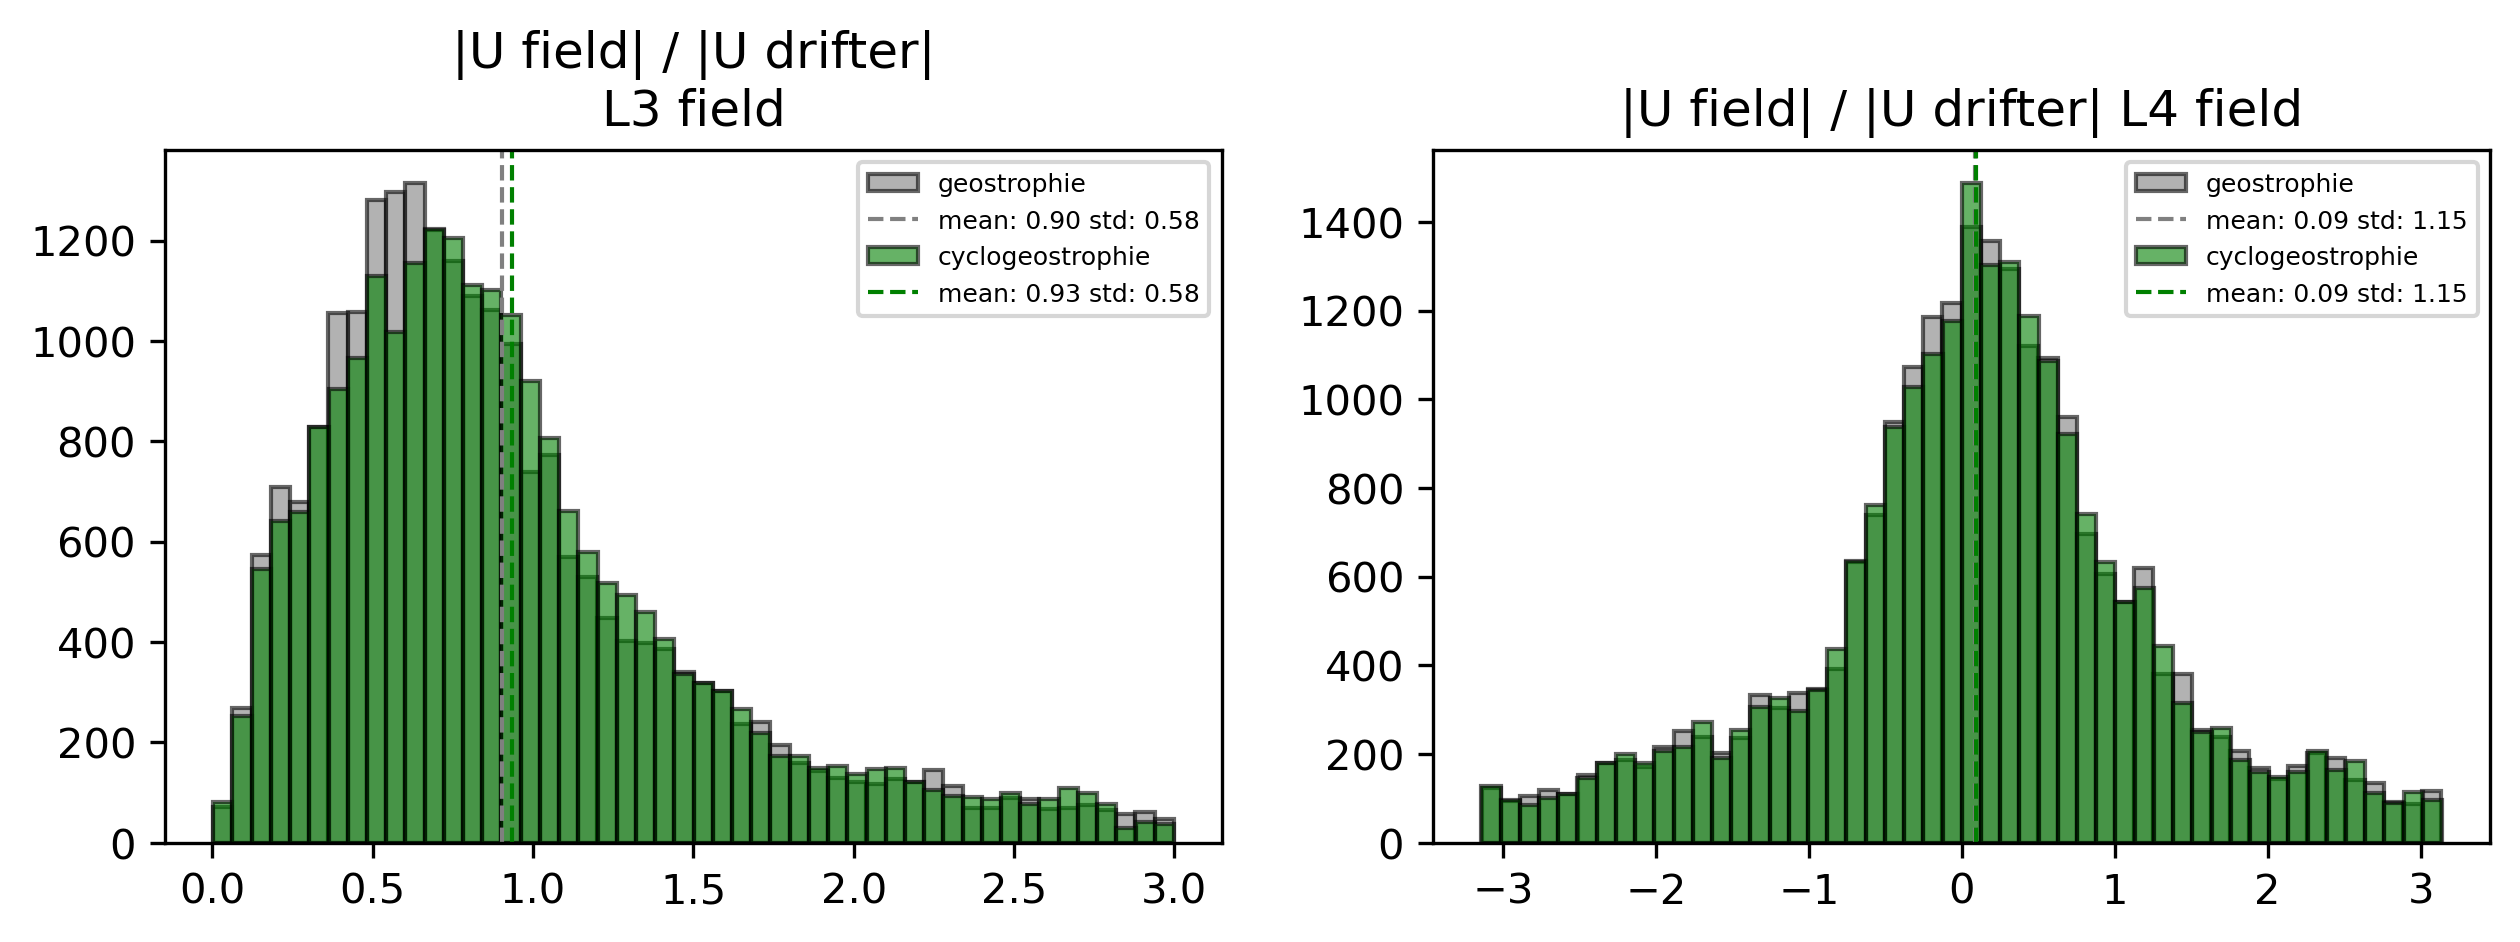

In [163]:
matplotlib.rcParams['figure.dpi'] = 300

plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
r  = r_geo
counts, bins, patches = plt.hist(r, bins=50, alpha=0.6, color='grey', edgecolor='black', label='geostrophie')
plt.axvline(r.mean(), color='grey', linestyle='dashed', linewidth=1, label=f'mean: {r.mean():.2f} std: {r.std():.2f}')

r = r_var
counts, bins, patches = plt.hist(r, bins=50, alpha=0.6, color='green', edgecolor='black', label='cyclogeostrophie')
plt.axvline(r.mean(), color='green', linestyle='dashed', linewidth=1, label=f'mean: {r.mean():.2f} std: {r.std():.2f}')
plt.legend(prop={'size': 6})
plt.title('|U field| / |U drifter|\nL3 field')

plt.subplot(1, 2, 2)
theta  = theta_geo
counts, bins, patches = plt.hist(theta, bins=50, alpha=0.6, color='grey', edgecolor='black', label='geostrophie')
plt.axvline(theta.mean(), color='grey', linestyle='dashed', linewidth=1, label=f'mean: {theta.mean():.2f} std: {theta.std():.2f}')

theta = theta_var
counts, bins, patches = plt.hist(theta, bins=50, alpha=0.6, color='green', edgecolor='black', label='cyclogeostrophie')
plt.axvline(theta.mean(), color='green', linestyle='dashed', linewidth=1, label=f'mean: {theta.mean():.2f} std: {theta.std():.2f}')
plt.legend(prop={'size': 6})
plt.title('|U field| / |U drifter| L4 field')

name = 'hist_norm_angle_'
plt.savefig(os.path.join(path_save_plots, name+suffix+'.png'), bbox_inches='tight', dpi = 300)

In [167]:
vmax = 70

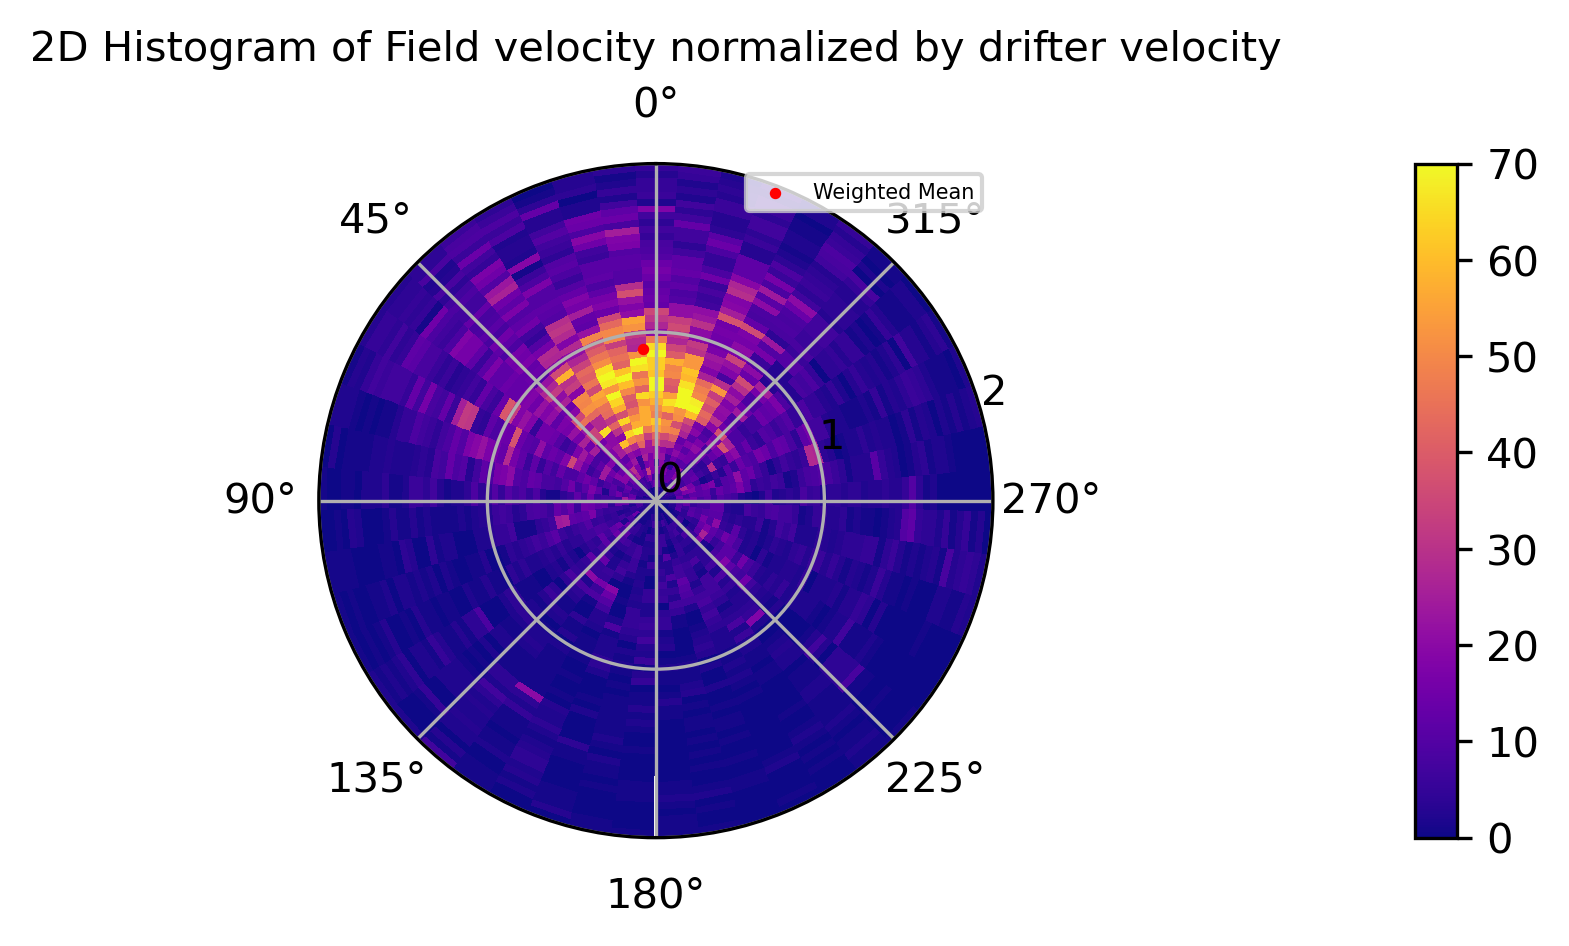

In [169]:
matplotlib.rcParams['figure.dpi'] = 300
utils_plots.plot_2d_polar_hist(r_geo, theta_geo, rmax=2, vmax=vmax)

name = 'hist2D_polar_geo_'
plt.savefig(os.path.join(path_save_plots, name+suffix+'.png'), bbox_inches='tight', dpi = 300)

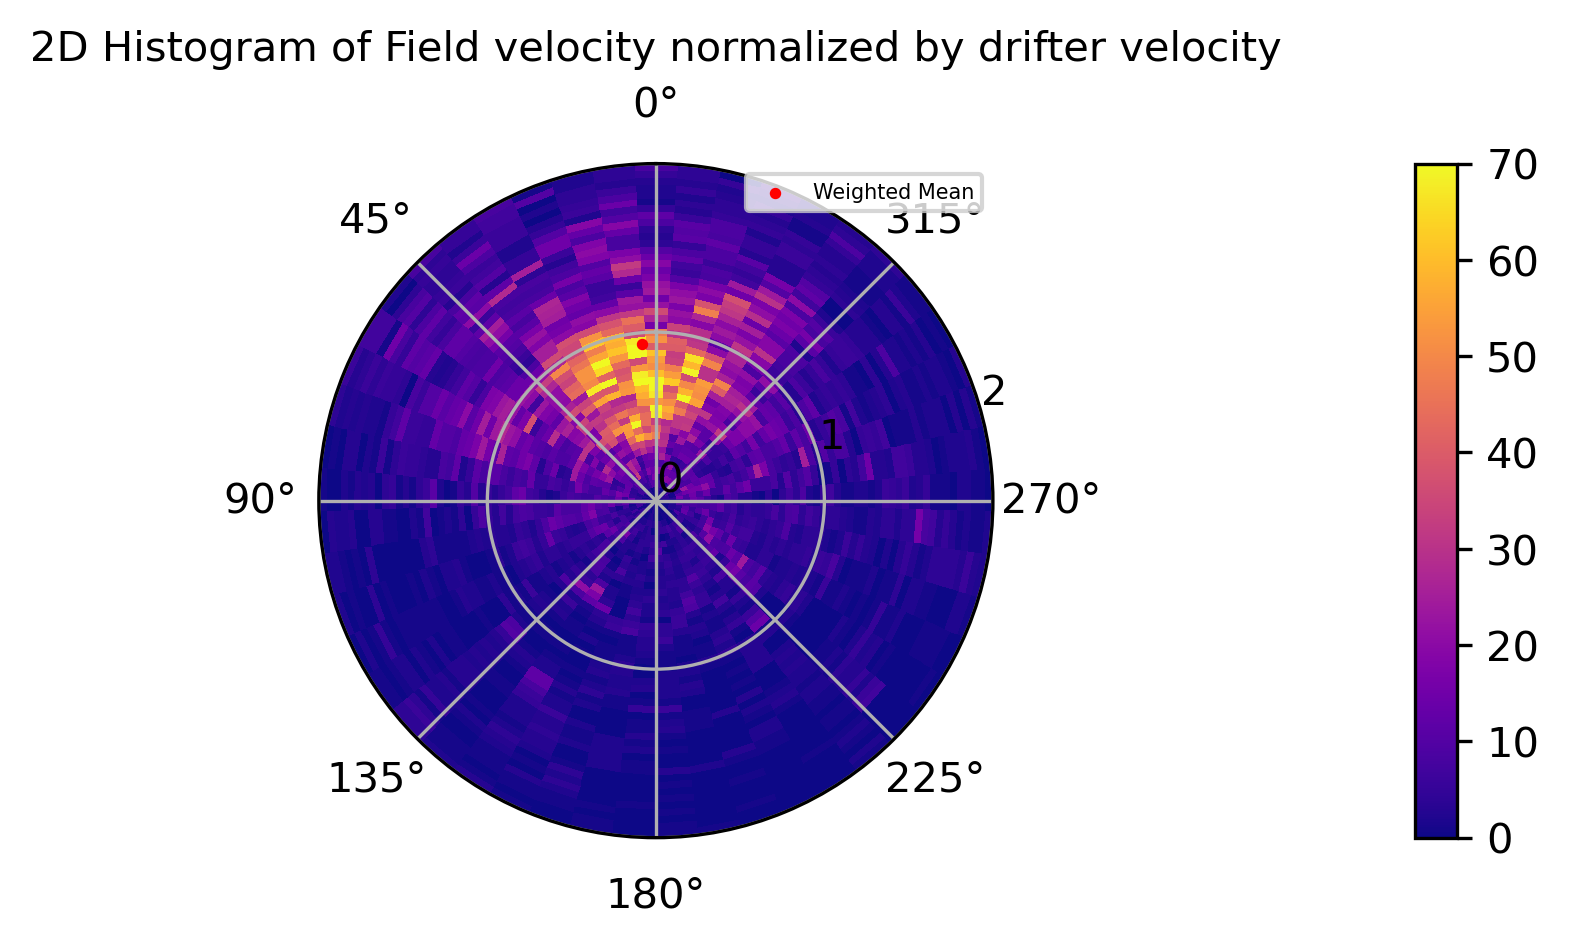

In [170]:
matplotlib.rcParams['figure.dpi'] = 300
utils_plots.plot_2d_polar_hist(r_var, theta_var, rmax=2, vmax=vmax)

name = 'hist2D_polar_cyclo_'
plt.savefig(os.path.join(path_save_plots, name+suffix+'.png'), bbox_inches='tight', dpi = 300)